# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


### 3-1 단순 선형 회귀(Simple Linear Regression)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

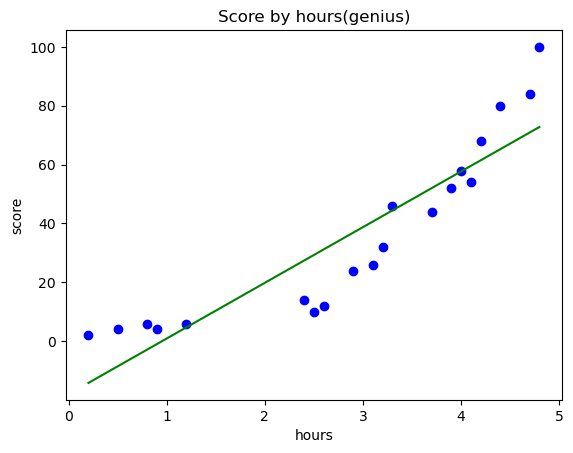

In [7]:
plt.scatter(X, y, color = 'blue') #산점도
plt.plot(X,reg.predict(X), color = 'green') #선 그래프
plt.title("Score by hours(genius)") #제목
plt.xlabel("hours") #x축 이름
plt.ylabel("score") #y축 이름
plt.show()

In [9]:
reg.score(X,y) #전체 데이터를 통한 모델 평가(모델의 완성도)

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x가 3이라면 [1, 3, 9] 으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [14]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [16]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y를 가지고 모델 생성(학습)

LinearRegression()

### 데이터 시각화 (변환된 X 와 y)

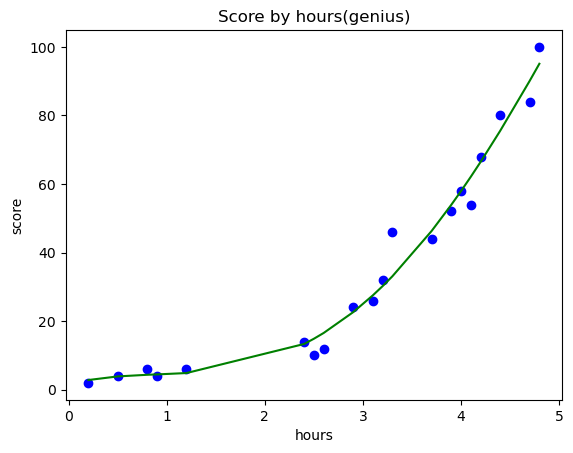

In [21]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)), color = 'green')
plt.title("Score by hours(genius)") #제목
plt.xlabel("hours") #X축 이름
plt.ylabel("score") #y축 이름
plt.show()

In [23]:
X_range = np.arange(min(X), max(X), 0.1) #X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

C:\Users\user\AppData\Local\Temp\ipykernel_14416\1763219017.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) #X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [25]:
X_range.shape

(46,)

In [27]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [29]:
X.shape

(20, 1)

In [31]:
X_range = X_range.reshape(len(X_range),1) #row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [33]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

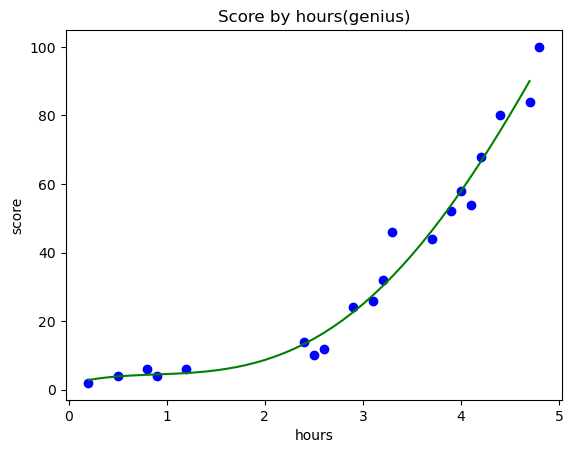

In [35]:
plt.scatter(X,y,color = 'blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green')
plt.title("Score by hours(genius)") #제목
plt.xlabel("hours") #X축 이름
plt.ylabel("score") #y축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [38]:
reg.predict([[2]]) #2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [40]:
lin_reg.predict(poly_reg.fit_transform([[2]])) #2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [42]:
lin_reg.score(X_poly,y) #단순 회귀보다 성능이 높게 나옴

0.9782775579000045